   <h1> Visualising Time Series Data </h1> 

<h2>Import Modules</h2>

In [42]:
from datetime import datetime
import pyodbc # for commecting to sql
import pandas as pd
import numpy as np
import seaborn as sns # gives better plots
sns.set(rc={'figure.figsize':(11, 4)})
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

<h2>Connect to SQL</h2>

In [43]:
# establish an open connection to SQL
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=Your-Server-Name-here;'
                      'Database=AdventureWorks2012;'
                      'Trusted_Connection=yes;')

<h2> Import dataset </h2>

In [103]:
MonthlySales = pd.read_sql_query("""
select 
	  DATENAME(YEAR, SOH.OrderDate) as SalesYear,
	  dateName(Month, SOH.OrderDate) as SalesMonths,
	  PC.Name as ProductName,
	  ST.Name as Country,
	 sum(cast((SOD.UnitPrice * SOD.OrderQty)AS DECIMAL(10,2))) as [Total Sales]
  FROM [AdventureWorks2012].[Sales].[SalesOrderHeader] SOH
  left join [Sales].[SalesOrderDetail] SOD 
  on SOH.SalesOrderID = SOD.SalesOrderID
  left join [Production].[Product] P
  on SOD.ProductID = P.ProductID
  left join [Production].[ProductSubcategory] PS
  on P.ProductSubcategoryID = PS.ProductSubcategoryID
  left join [Production].[ProductCategory] PC
  on PS.ProductCategoryID = PC.ProductCategoryID
  left join [Sales].[SalesTerritory] ST
  on SOH.TerritoryID = ST.TerritoryID

  where 1 = 1
  and SOH.OrderDate between '2013-01-01' and '2013-12-31'
  and PC.Name = 'Bikes'
  and ST.Name = 'United Kingdom'

  group by  DATENAME(YEAR, SOH.OrderDate),dateName(Month, SOH.OrderDate),PC.Name,ST.Name 
  order by case when dateName(Month, SOH.OrderDate) = 'January' then 1
  when dateName(Month, SOH.OrderDate) = 'February' then 2
  when dateName(Month, SOH.OrderDate) = 'March' then 3
  when dateName(Month, SOH.OrderDate) = 'April' then 4
  when dateName(Month, SOH.OrderDate) = 'May' then 5
  when dateName(Month, SOH.OrderDate) = 'June' then 6
  when dateName(Month, SOH.OrderDate) = 'July' then 7
  when dateName(Month, SOH.OrderDate) = 'August' then 8
  when dateName(Month, SOH.OrderDate) = 'September' then 9
  when dateName(Month, SOH.OrderDate) = 'October' then 10
  when dateName(Month, SOH.OrderDate) = 'November' then 11
  when dateName(Month, SOH.OrderDate) = 'December' then 12
  else NULL end
""", conn)

<h2> EDA </h2>

In [104]:
MonthlySales.head()

,SalesYear,SalesMonths,ProductName,Country,Total Sales
0,2013,January,Bikes,United Kingdom,170928.71
1,2013,February,Bikes,United Kingdom,92512.67
2,2013,March,Bikes,United Kingdom,142663.10
3,2013,April,Bikes,United Kingdom,165719.71
4,2013,May,Bikes,United Kingdom,172662.79


In [105]:
MonthlySales.shape # check the dimention of the data

(12, 5)

The DataFrame has 12 rows, covering the period from January 1, 2013 through December 31, 2013. 

In [106]:
# no of unique months
MonthlySales["SalesMonths"].nunique()

12

In [107]:
MonthlySales.describe()

,Total Sales
count,12.000000
mean,260168.444167
std,131202.020828
min,92512.670000
25%,169626.460000
50%,242194.085000
75%,303118.790000
max,520717.570000


By looking at the above describe(), we can tell the data contain outlier/s

In [108]:
MonthlySales.dtypes

SalesYear       object
SalesMonths     object
ProductName     object
Country         object
Total Sales    float64
dtype: object

In [109]:
MonthlySales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SalesYear    12 non-null     object 
 1   SalesMonths  12 non-null     object 
 2   ProductName  12 non-null     object 
 3   Country      12 non-null     object 
 4   Total Sales  12 non-null     float64
dtypes: float64(1), object(4)
memory usage: 608.0+ bytes


<AxesSubplot:xlabel='SalesMonths', ylabel='Total Sales'>

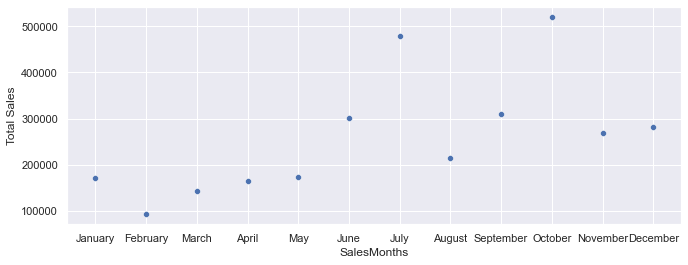

In [110]:
sns.scatterplot(MonthlySales["SalesMonths"],MonthlySales["Total Sales"])

In [111]:
#Make a copy of the dataset
MonthlySales = MonthlySales.copy()
MonthlySales.head()

,SalesYear,SalesMonths,ProductName,Country,Total Sales
0,2013,January,Bikes,United Kingdom,170928.71
1,2013,February,Bikes,United Kingdom,92512.67
2,2013,March,Bikes,United Kingdom,142663.10
3,2013,April,Bikes,United Kingdom,165719.71
4,2013,May,Bikes,United Kingdom,172662.79


<h2> Data Preprocessing</h2>

 Indexing with Time Series Data 

In [112]:
MonthlySales = MonthlySales.set_index('SalesMonths')
MonthlySales.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='SalesMonths')

In [113]:
MonthlySales.dtypes

SalesYear       object
ProductName     object
Country         object
Total Sales    float64
dtype: object

<h2> Visualising Monthly Bike Sales Time Series Data </h2>

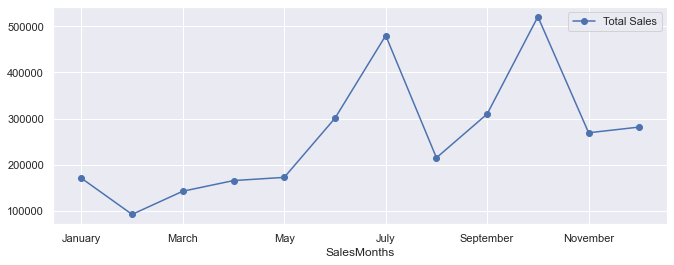

In [114]:
#Plot the data
MonthlySales.plot(marker='o', linestyle='-')
plt.show()